In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,OrderNumber,Category,QuantityOrdered,PriceEach,OrderLineNumber,Sales,OrderDate,Status,QTR_ID,Year_ID,CustomerName,Country,DealSize
0,10001,Jewelry,8,442.81,8,2583.52,2023-01-01,Cancelled,3,2023,Customer C,USA,Large
1,10002,Food,14,168.93,7,1924.90,2023-01-08,Cancelled,4,2022,Customer C,Germany,Large
2,10003,Books,23,69.82,3,900.64,2023-01-15,Pending,1,2024,Customer C,Canada,Medium
3,10004,Jewelry,40,184.59,1,4340.31,2023-01-22,Cancelled,4,2024,Customer A,France,Medium
4,10005,Clothing,21,454.35,1,6916.15,2023-01-29,Shipped,3,2022,Customer C,Canada,Medium


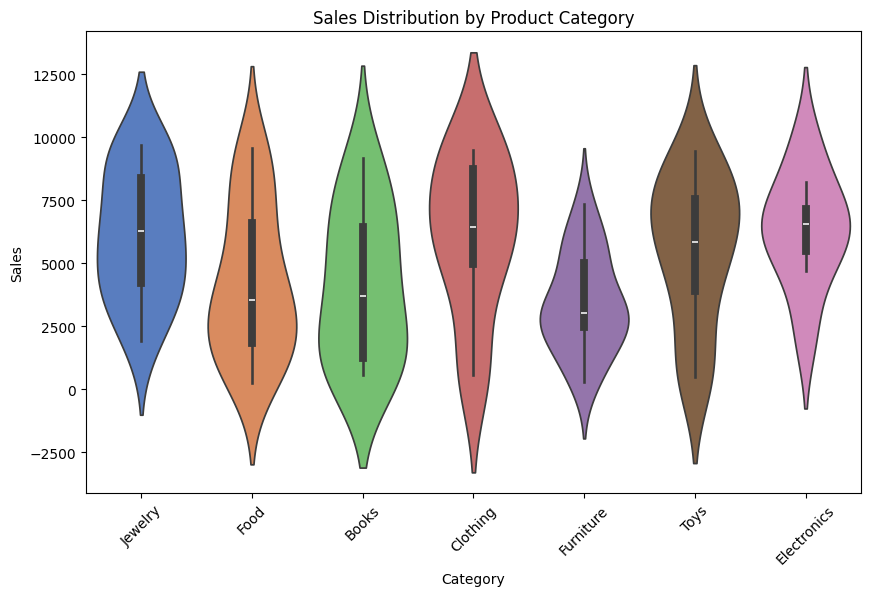

In [3]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Sales', hue='Category', data=df, palette='muted', legend=False)
plt.xticks(rotation=45)
plt.title('Sales Distribution by Product Category')
plt.show()

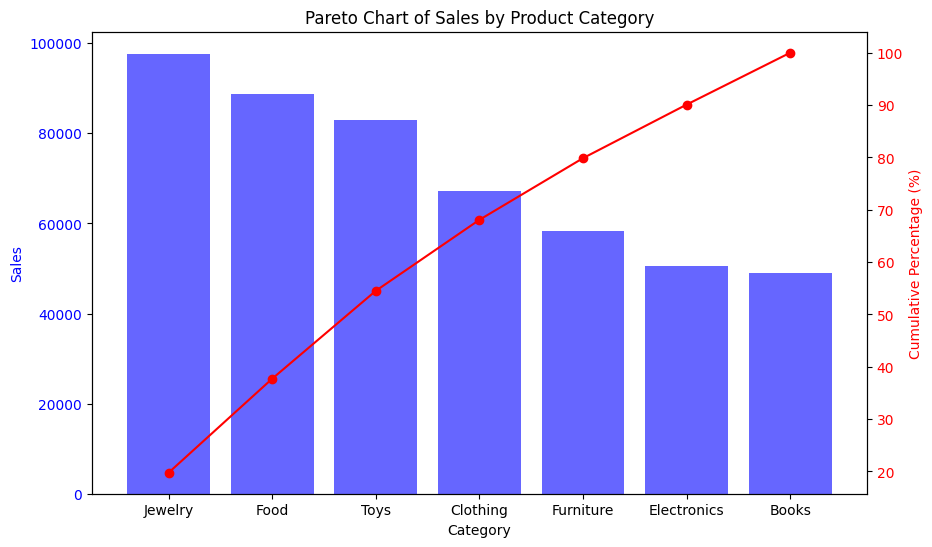

In [4]:

# Pareto Chart
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
cumulative_sales = category_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(category_sales.index, category_sales, color='b', alpha=0.6, label='Sales')
ax1.set_xlabel('Category')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(category_sales.index, cumulative_percentage, color='r', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Pareto Chart of Sales by Product Category')
plt.show()

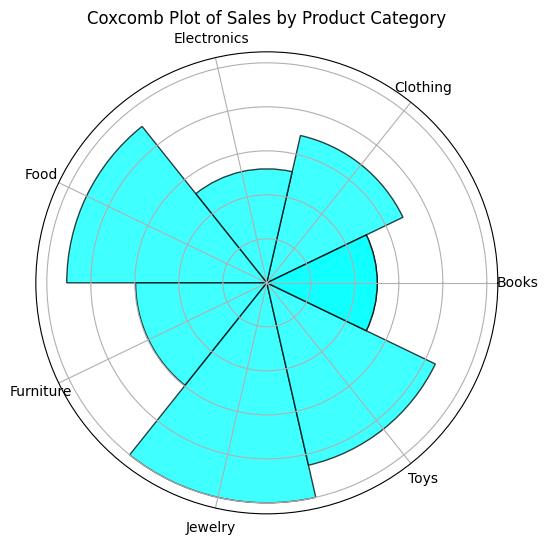

In [5]:
# Coxcomb Plot
category_sales = df.groupby('Category')['Sales'].sum()
num_categories = len(category_sales)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]  
sales_values = category_sales.tolist()
sales_values += sales_values[:1]  
max_sales = max(sales_values)
radii = [value / max_sales for value in sales_values]
bars = ax.bar(angles, radii, width=2 * np.pi / num_categories, color='cyan', alpha=0.75, edgecolor='black')
ax.set_yticklabels([])  
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(category_sales.index, rotation=45)
plt.title('Coxcomb Plot of Sales by Product Category')
plt.show()

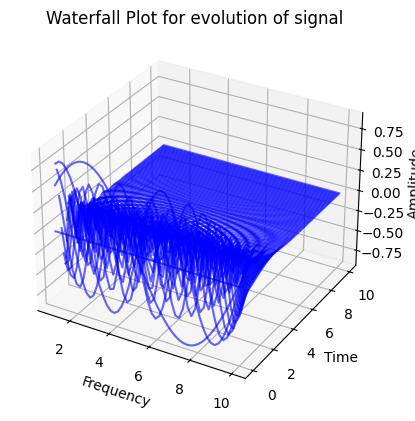

In [9]:
time = np.linspace(0, 10, 100)
frequency = np.linspace(1, 10, 50)
T, F = np.meshgrid(time, frequency)

Z = np.sin(2 * np.pi * F * T) * np.exp(-T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(time)):
    ax.plot(frequency, Z[:, i], zs=time[i], zdir='y', color='blue', alpha=0.6)

ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
plt.title("Waterfall Plot for evolution of signal")
plt.savefig('waterfall_plot.png')
plt.show()
